# Cosmology MCMC notebook!

## Play with data

In [1]:
!pip install getdist
#!pip install cobaya

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
from getdist import plots, MCSamples
import getdist

We will look at Supernova type Ia observations. These supernova are formed from the slow accumulation of mass from a nearby star until it reaches a critical mass of 1.4(?) solar masses, after which it goes supernova at always EXACTLY the same brightness. Therefore, the observed magnitude is only a function of their distance from earth. 

Our source of data is from [Union2.1](http://supernova.lbl.gov/Union/).

A detailed example on how to manipulate and plot this data, and estimate H0 can be found here: [https://labcit.ligo.caltech.edu/~ajw/ph4/hubble.py](https://labcit.ligo.caltech.edu/~ajw/ph4/hubble.py).

In [3]:
dataloc = "http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt"

# Read in data as numpy array.
# Format is [name, redshift, magnitude, magnitude error, and another number?]
data = np.genfromtxt(dataloc)

# Print the first line as an example. (Note that genfromtxt turns the names into 'Not A Number')
print(data[0])

[           nan 2.84880000e-02 3.53465834e+01 2.23905933e-01
 1.28418942e-01]


In [4]:
# pull out the redshifts (zs), magnitudes (mm) and magnitude estimated errors (dm)
zs = data.T[1]
mm = data.T[2]
dm = data.T[3]

In [5]:
# mm is the "distance modulus" - http://en.wikipedia.org/wiki/Distance_modulus
# from which we can compute the distance in parsecs (pc).
# Note that Numpy allows us to manipulate the whole array at once:
dpc = 10.**(mm/5.+1.)

# and in megaparsecs (Mpc)
dMpc = dpc / 10.**6

# and the error on that distance:
dMe = 10.**((mm+dm)/5.+1.-6.) - dMpc

<ErrorbarContainer object of 3 artists>

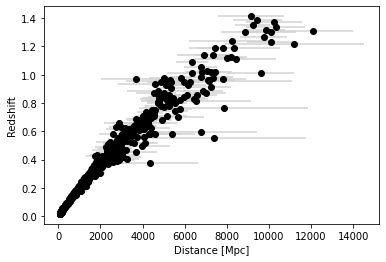

In [10]:
# Plot distance versus redshift
#plt.scatter(dMpc, zs)
# Fancier plot including error bars
plt.xlabel("Distance [Mpc]")
plt.ylabel("Redshift")
plt.errorbar(dMpc, zs, xerr=dMe, fmt='o', color='black', ecolor='lightgray')

## Markov-Chain Monte Carlo
Now let's do some MCMC on some generated data. 

Example is from [https://getdist.readthedocs.io/en/latest/plot_gallery.html](https://getdist.readthedocs.io/en/latest/plot_gallery.html)

In [32]:
# Generate some 4D distributions with numpy

ndim = 4
nsamp = 10000
np.random.seed(10)

# 4x4 = 16 random from a flat distribution [0,1]
A = np.random.rand(ndim,ndim) 
print("A = ",A)

# Create a covariance matrix
cov = np.dot(A, A.T) 
print("\ncov = ",cov)

# Generate 'ndim'*'nsamp' random values from an 'ndim'-dimensional Gaussian distribution
samps1 = np.random.multivariate_normal([0]*ndim, cov, size=nsamp)
print("\nsamps1 = ",samps1)

# Create a second sample
A = np.random.rand(ndim,ndim)
cov = np.dot(A, A.T)
samps2 = np.random.multivariate_normal([0]*ndim, cov, size=nsamp)

A =  [[0.77132064 0.02075195 0.63364823 0.74880388]
 [0.49850701 0.22479665 0.19806286 0.76053071]
 [0.16911084 0.08833981 0.68535982 0.95339335]
 [0.00394827 0.51219226 0.81262096 0.61252607]]

cov =  [[1.55758352 1.08416425 1.28045358 0.9872521 ]
 [1.08416425 0.91667864 0.96499068 0.74390226]
 [1.28045358 0.96499068 1.41507935 1.1868307 ]
 [0.9872521  0.74390226 1.1868307  1.29789751]]

samps1 =  [[ 1.48141289  1.23465036  0.88360192  0.48051532]
 [ 1.04325096  1.25792555  1.66063953  0.84389961]
 [ 1.66639956  1.61887132  1.9537865   3.22328662]
 ...
 [ 0.35218584  0.14119053  0.51863005  0.68278144]
 [-2.28800058 -1.52156672 -2.45754794 -2.66126869]
 [-1.24684724 -0.45358785 -0.96451894 -0.93341712]]


In [35]:
# Create the GetDist 'MCSamples' objects:
# See https://getdist.readthedocs.io/en/latest/mcsamples.html 

names    = ["x%s"%i for i in range(ndim)]
labels   = ["x_%s"%i for i in range(ndim)]
samples1 = MCSamples(samples=samps1, names = names, labels = labels, label='First set')
samples2 = MCSamples(samples=samps2, names = names, labels = labels, label='Second set')

Removed no burn in
Removed no burn in


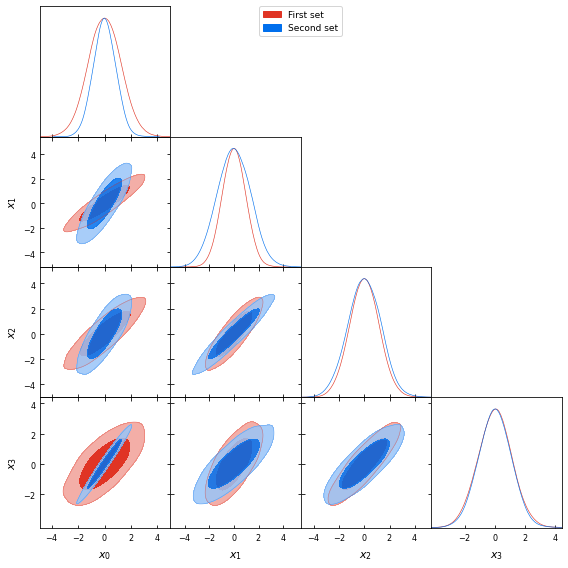

In [34]:
# Triangle plots

g = plots.get_subplot_plotter()
g.triangle_plot([samples1, samples2], filled=True)

In [23]:
# Principle Component Analysis

print(samples.PCA(['x1','x2']))

PCA for parameters:
         2 :x_1
         3 :x_2

Correlation matrix for reduced parameters
          x1 :  1.0000  0.8487
          x2 :  0.8487  1.0000

e-values of correlation matrix
PC 1:   0.1513
PC 2:   1.8487

e-vectors
  2: -0.7071  0.7071
  3:  0.7071  0.7071

Principle components
PC1 (e-value: 0.151292)
[0.958949]   (x_1-0.004343)/1.000000)
[-0.958949]   (x_2-0.000594)/-1.229803)
          = -0.000000 +- 0.527496

PC2 (e-value: 1.848708)
[1.179318]   (x_1-0.004343)/0.813139)
[1.179318]   (x_2-0.000594)/1.000000)
          = -0.000000 +- 2.267672

Correlations of principle components
       1       2
PC 1   1.000   0.000
PC 2   0.000   1.000
   1   0.077   0.921   (x_0)
   2   0.275   0.961   (x_1)
   3  -0.275   0.961   (x_2)
   4  -0.353   0.807   (x_3)

